In [4]:
# Load, explore and plot data
import numpy as np
import pandas as pd
import re
import string

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
## Reading the given dataset
data = pd.read_csv("spam_messages_train.csv", encoding="latin1", on_bad_lines='skip')

In [8]:
data.columns = ["label", "message"]

In [9]:
data.head()

,label,message
0,ham,"Funny fact Nobody teaches volcanoes 2 erupt, t..."
1,ham,I sent my scores to sophas and i had to do sec...
2,spam,We know someone who you know that fancies you....
3,ham,Only if you promise your getting out as SOON a...
4,spam,Congratulations ur awarded either ï¿½500 of CD...


In [10]:
data.shape

(47392, 2)

In [11]:
# Checking for NUll values
data.isnull().sum()

label      0
message    0
dtype: int64

In [12]:
# Checking for duplicate values
data.duplicated().sum()

np.int64(2823)

*There are 403 duplicated values and we have to remove them*

In [13]:
# drop duplicates
data = data.drop_duplicates()

In [14]:
data.duplicated().sum()

np.int64(0)

In [15]:
data.shape

(44569, 2)

## 1. Exploratory Data Analysis

**Let's plot the Pie Chart to check the percentage distribution of our target variable.** 

In [16]:
data['label'].value_counts()

label
ham     27677
spam    16892
Name: count, dtype: int64

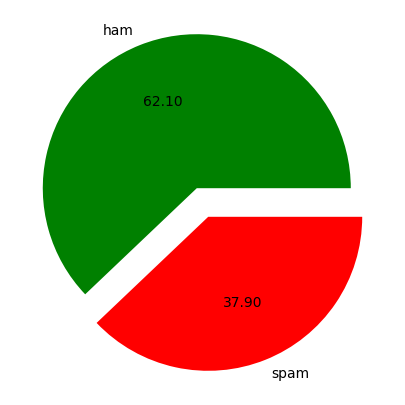

In [17]:
plt.figure(figsize=(9, 5))

plt.pie(data['label'].value_counts(),labels=['ham','spam'],autopct='%0.2f', colors=['Green', 'Red'], explode = [.1, .1])
plt.show()

***So, we can observe that dataset is quite imbalanced as 62.10% messages are ham whereas 37.90% messages are spam.***

In [18]:
data['message'][0]

'Funny fact Nobody teaches volcanoes 2 erupt, tsunamis 2 arise, hurricanes 2 sway aroundn no 1 teaches hw 2 choose a wife Natural disasters just happens'

In [19]:
#natural language tool kit
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sarat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
# For a number of characters

data['num_characters']=data['message'].apply(len)
data.head()

,label,message,num_characters
0,ham,"Funny fact Nobody teaches volcanoes 2 erupt, t...",151
1,ham,I sent my scores to sophas and i had to do sec...,221
2,spam,We know someone who you know that fancies you....,101
3,ham,Only if you promise your getting out as SOON a...,124
4,spam,Congratulations ur awarded either ï¿½500 of CD...,152


In [21]:
# For a number of words
from nltk.tokenize import word_tokenize
data['message'].apply(lambda x: nltk.word_tokenize(x))

0        [Funny, fact, Nobody, teaches, volcanoes, 2, e...
1        [I, sent, my, scores, to, sophas, and, i, had,...
2        [We, know, someone, who, you, know, that, fanc...
3        [Only, if, you, promise, your, getting, out, a...
4        [Congratulations, ur, awarded, either, ï¿½500,...
                               ...                        
47385    [start, date, :, 1, /, 7, /, 02, ;, hourahead,...
47387    [please, change, the, sitara, tickets, dating,...
47388    [from, mr, ., silas, sankoh, ecobank, benin, r...
47389    [just, to, get, things, stirred, up, :, the, e...
47390    [sorry, for, the, oversight, ., bill, -, -, -,...
Name: message, Length: 44569, dtype: object

In [22]:
data['num_words']=data['message'].apply(lambda x:len(nltk.word_tokenize(x)))
data.head()

,label,message,num_characters,num_words
0,ham,"Funny fact Nobody teaches volcanoes 2 erupt, t...",151,28
1,ham,I sent my scores to sophas and i had to do sec...,221,47
2,spam,We know someone who you know that fancies you....,101,22
3,ham,Only if you promise your getting out as SOON a...,124,31
4,spam,Congratulations ur awarded either ï¿½500 of CD...,152,23


In [23]:
# For a number of sentences

data['num_sentences']=data['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [24]:
data.head()

,label,message,num_characters,num_words,num_sentences
0,ham,"Funny fact Nobody teaches volcanoes 2 erupt, t...",151,28,1
1,ham,I sent my scores to sophas and i had to do sec...,221,47,3
2,spam,We know someone who you know that fancies you....,101,22,3
3,ham,Only if you promise your getting out as SOON a...,124,31,2
4,spam,Congratulations ur awarded either ï¿½500 of CD...,152,23,1


In [25]:
# For Ham messages

data[data['label']=='ham'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,27677.000000,27677.000000,27677.000000
mean,858.770893,180.051776,9.191639
std,3569.090574,715.693224,44.023667
min,1.000000,1.000000,1.000000
25%,68.000000,15.000000,1.000000
50%,332.000000,68.000000,2.000000
75%,799.000000,154.000000,8.000000
max,228353.000000,45450.000000,2827.000000


In [26]:
# For Spam messages:

data[data['label']=='spam'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,16892.000000,16892.000000,16892.000000
mean,995.541085,194.062041,12.648650
std,1676.797313,335.097501,36.413023
min,1.000000,1.000000,1.000000
25%,208.000000,38.000000,1.000000
50%,477.000000,90.000000,5.000000
75%,908.250000,190.000000,14.000000
max,28692.000000,8386.000000,3093.000000


*We can clearly see the spam messages are quite longer than the ham messages.*

<Axes: xlabel='num_characters', ylabel='Count'>

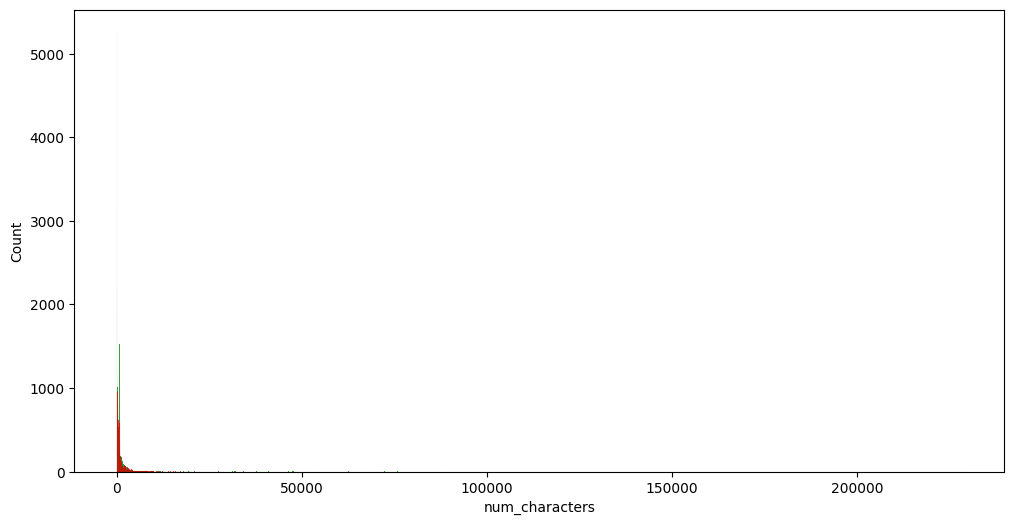

In [33]:
#for characters
plt.figure(figsize=(12,6))
sns.histplot(data[data['label']=='ham']['num_characters'],color='green')
sns.histplot(data[data['label']=='spam']['num_characters'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

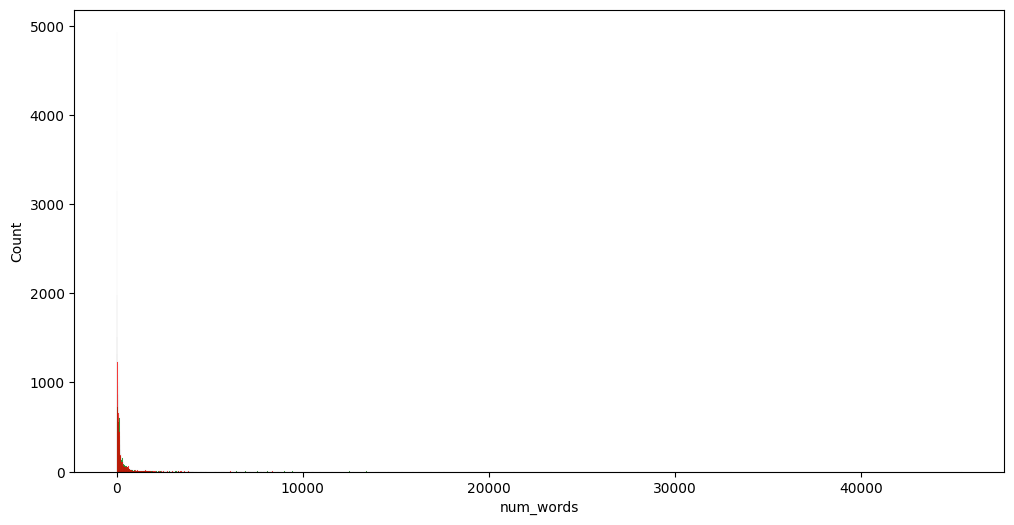

In [32]:
#for words
plt.figure(figsize=(12,6))
sns.histplot(data[data['label']=='ham']['num_words'],color='green')
sns.histplot(data[data['label']=='spam']['num_words'],color='red')

### Word Cloud
*Now, to get a clear idea about the most frequent words used we make a  word cloud.*

In [34]:
pip install wordcloud

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ------------ --------------------------- 92.2/301.4 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------  297.0/301.4 kB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 2.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [35]:
from wordcloud import WordCloud

In [36]:
ham_msg_text = data[data.label == 'ham'].message
spam_msg_text = data[data.label == 'spam'].message

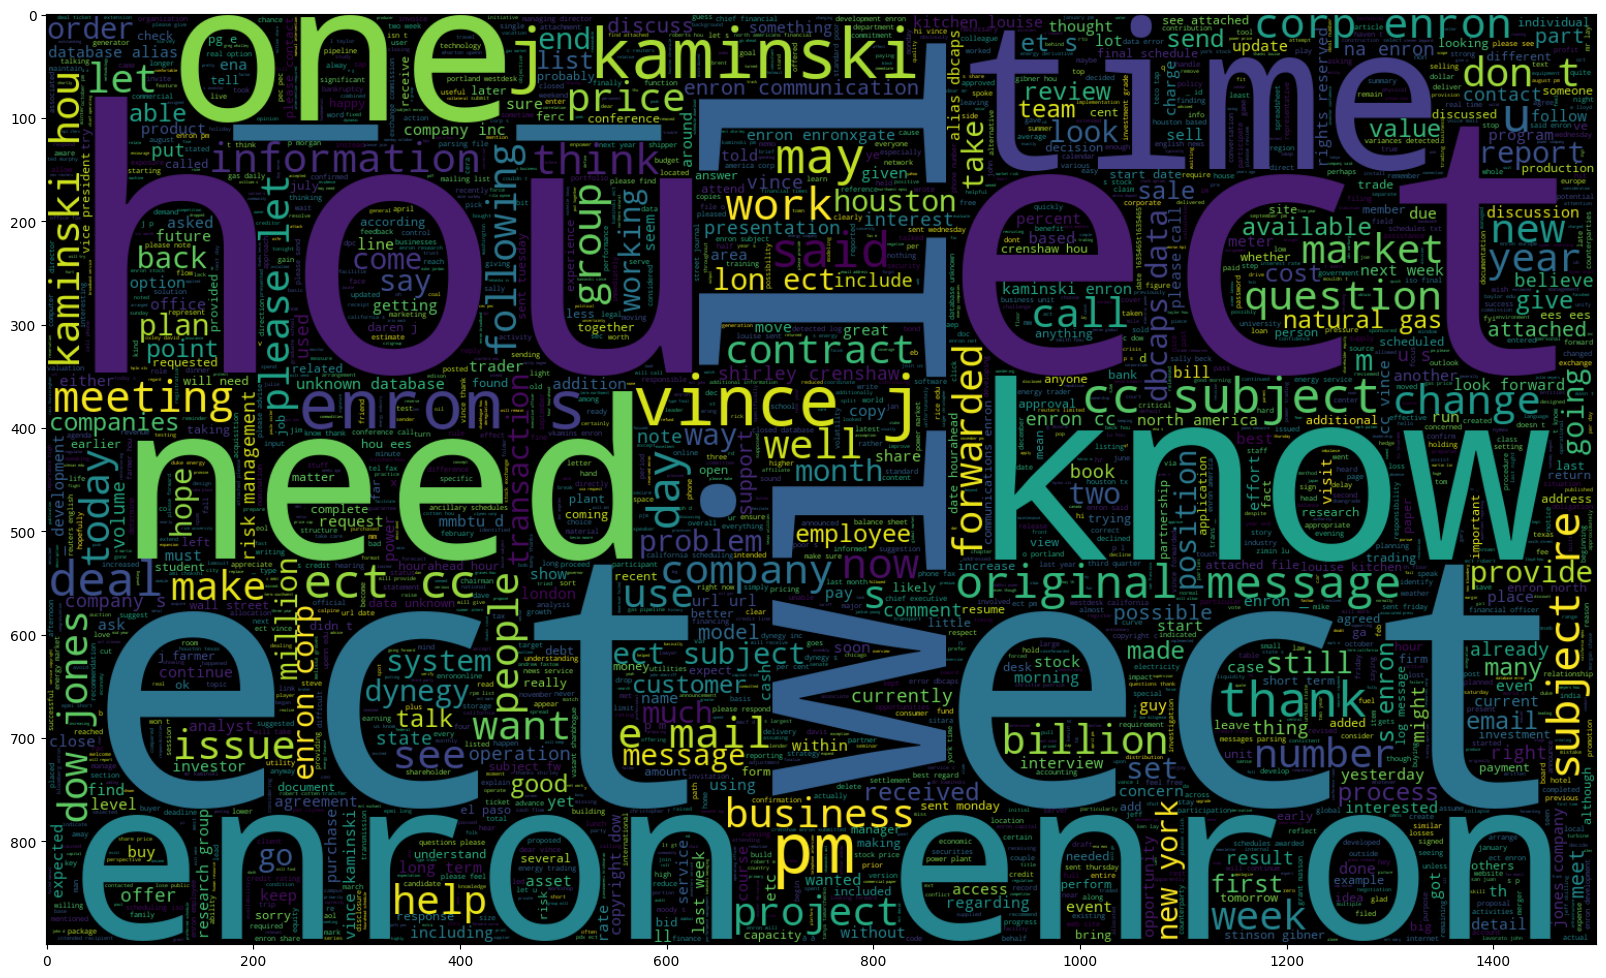

In [37]:
## Word Cloud for Ham MSGs

plt.figure(figsize = (20, 22))

wc = WordCloud(width = 1500, height = 900, max_words = 2500).generate(" ".join(ham_msg_text))
plt.imshow(wc, interpolation='bilinear')

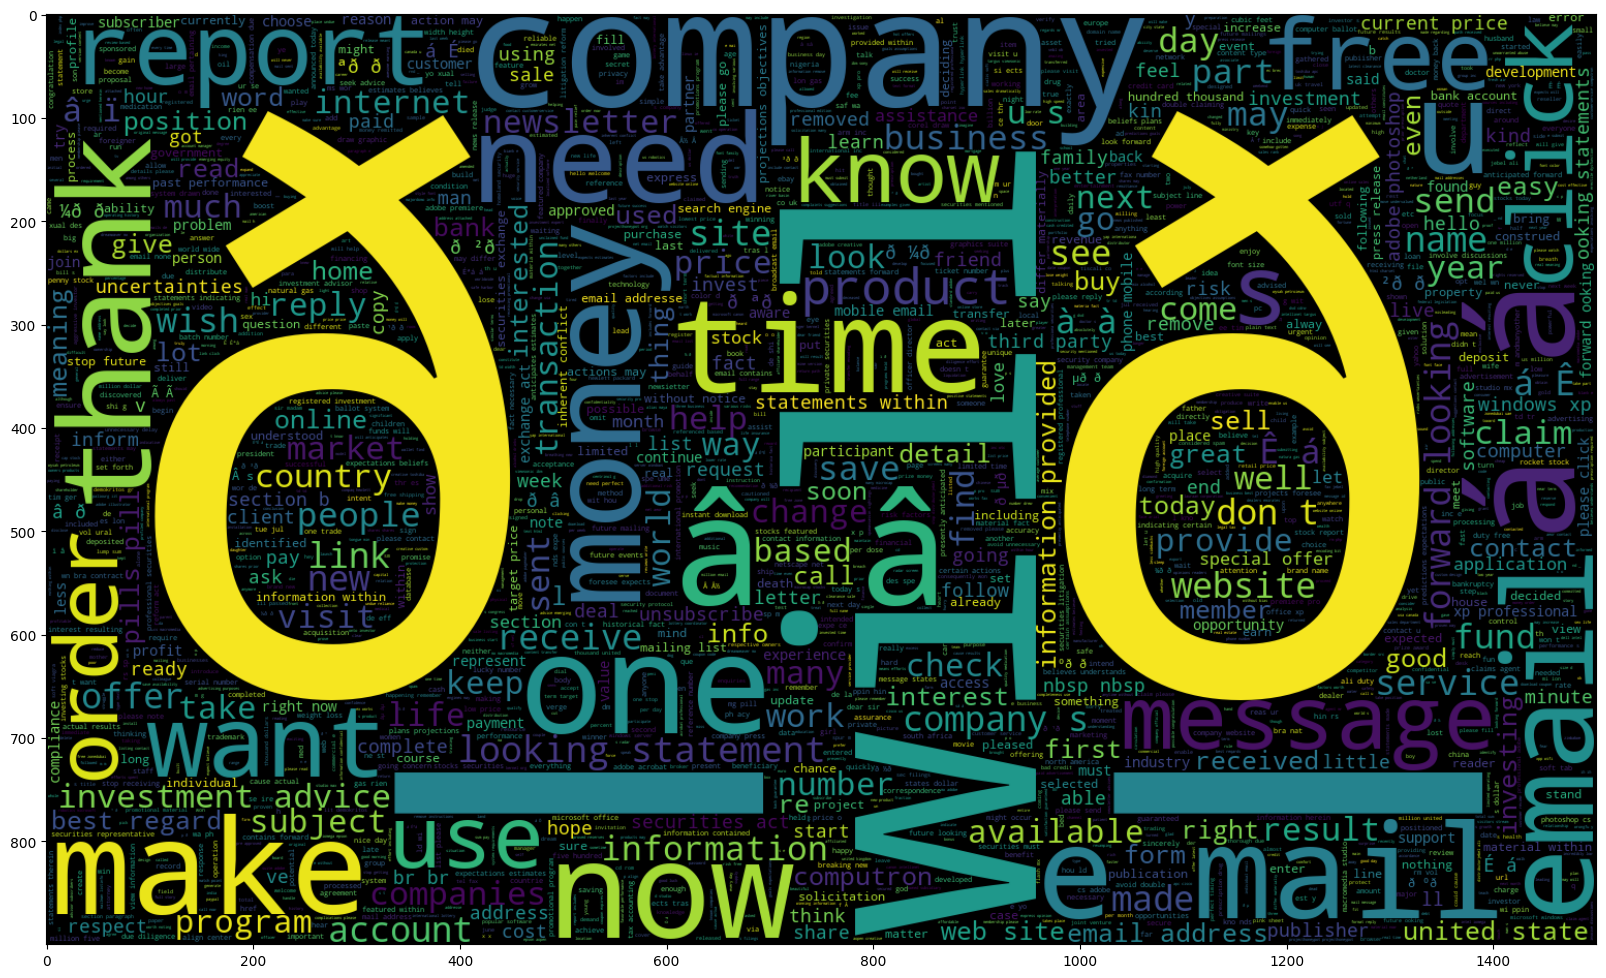

In [38]:
## Word Cloud for Spam MSGs

plt.figure(figsize = (20, 22))

wc = WordCloud(width = 1500, height = 900, max_words = 2500).generate(" ".join(spam_msg_text))
plt.imshow(wc, interpolation='bilinear')

## 2. Data Pre-processing

In [39]:
u = data['message'][3]
u

"Only if you promise your getting out as SOON as you can. And you'll text me in the morning to let me know you made it in ok."

In [40]:
v = data['message'][8]
v

'Get down in gandhipuram and walk to cross cut road. Right side &lt;#&gt; street road and turn at first right.'

#### 1. Remove Punctuation

In [41]:
def remove_punc(text):
  trans = str.maketrans('', '', string.punctuation)
  return text.translate(trans)

In [42]:
data['message'] = data['message'].apply(remove_punc)

In [43]:
data['message'][8]

'Get down in gandhipuram and walk to cross cut road Right side ltgt street road and turn at first right'

#### 2. Remove Special Characters

In [44]:
def remove_noise(text):
  t = re.sub('[^a-zA-Z]', ' ', text)
  return t

In [45]:
data['message'] = data['message'].apply(remove_noise)

In [46]:
data['message'][8]

'Get down in gandhipuram and walk to cross cut road Right side ltgt street road and turn at first right'

#### 3. Remove Stopwords

In [47]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sarat\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [48]:
from nltk.corpus import stopwords
sw = stopwords.words('english')

In [49]:
len(sw)

179

In [50]:
def remove_sws(text):
  s = [word.lower() for word in text.split() if word.lower() not in sw]
  return " ".join(s)

In [51]:
data['message'] = data['message'].apply(remove_sws)

In [52]:
data['message'][8]

'get gandhipuram walk cross cut road right side ltgt street road turn first right'

#### 4. Lemmatization

In [53]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sarat\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sarat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sarat\AppData\Roaming\nltk_data...


True

In [54]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemma(text):
  l = [lemmatizer.lemmatize(word) for word in text.split()]
  return " ".join(l)

In [55]:
data['message'] = data['message'].apply(lemma)

In [56]:
data.head()

,label,message,num_characters,num_words,num_sentences
0,ham,funny fact nobody teach volcano erupt tsunami ...,151,28,1
1,ham,sent score sophas secondary application school...,221,47,3
2,spam,know someone know fancy call find pobox l hb p,101,22,3
3,ham,promise getting soon youll text morning let kn...,124,31,2
4,spam,congratulation ur awarded either cd gift vouch...,152,23,1


#### 5. Label Encoder
*As this is a classification problem we want the “label” to be binary classified i.e, 0 or 1 so for this purpose we use label encoder.*

In [59]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()

data['label']=encoder.fit_transform(data['label'])

In [60]:
data.head()

,label,message,num_characters,num_words,num_sentences
0,0,funny fact nobody teach volcano erupt tsunami ...,151,28,1
1,0,sent score sophas secondary application school...,221,47,3
2,1,know someone know fancy call find pobox l hb p,101,22,3
3,0,promise getting soon youll text morning let kn...,124,31,2
4,1,congratulation ur awarded either cd gift vouch...,152,23,1


In [61]:
# Select only the relevant columns for building model

data = data[['label','message']]

In [62]:
data.head()

,label,message
0,0,funny fact nobody teach volcano erupt tsunami ...
1,0,sent score sophas secondary application school...
2,1,know someone know fancy call find pobox l hb p
3,0,promise getting soon youll text morning let kn...
4,1,congratulation ur awarded either cd gift vouch...


## 3. Feature Extraction for Converting Word to Vectors
*Apply TF-IDF Vectorizer to convert word into Vectors.*

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=3000)

In [64]:
X = tf.fit_transform(data['message']).toarray()
y = data['label']

In [65]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [66]:
y

0        0
1        0
2        1
3        0
4        1
        ..
47385    0
47387    0
47388    1
47389    0
47390    0
Name: label, Length: 44569, dtype: int64

In [67]:
# Splitting the data into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

In [68]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35655, 3000), (8914, 3000), (35655,), (8914,))

## 4. Model Building & Evaluation

In [69]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [70]:
# Create the instance of Naive Bayes
clf = BernoulliNB()

In [71]:
# Fit the data
clf.fit(X_train, y_train)

BernoulliNB()

In [72]:
# Making prediction
y_pred = clf.predict(X_test)

In [73]:
# Evaluation
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.885012340139107


In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      5578
           1       0.94      0.74      0.83      3336

    accuracy                           0.89      8914
   macro avg       0.90      0.85      0.87      8914
weighted avg       0.89      0.89      0.88      8914



Text(120.72222222222221, 0.5, 'Truth')

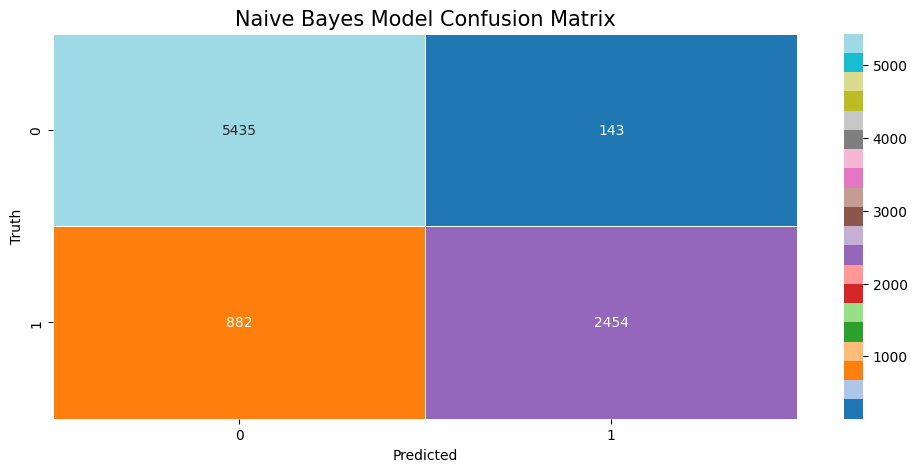

In [75]:
# Plot the Confusion Matrix

import seaborn as sn
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (12,5))
sn.heatmap(cm, annot=True,linewidth = 0.5 , cmap = 'tab20' , fmt='d')
plt.title('Naive Bayes Model Confusion Matrix', size=15)
plt.xlabel('Predicted')
plt.ylabel('Truth')

***Finally, After a lot of experiments and improvement, we have trained our model to get an Accuracy score of 99% and a precision Score of 97.5%.***

## 5. Save the Model

In [76]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(clf,open('model.pkl','wb'))